<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Example2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 2

In [ ]:
# Install necessary libraries if they are not already installed
!pip install pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 1. Data Collection (Example: Simulated Healthcare Patient Visit Data)
def collect_healthcare_data():
    data = {
        'Patient_ID': range(1, 11),
        'Patient_Age': [34, 67, 50, 45, 72, 30, 65, 60, 40, 38],
        'Diagnosis': ['Diabetes', 'Hypertension', 'Asthma', 'Diabetes', 'Hypertension', 'Asthma', 'Diabetes', 'Hypertension', 'Asthma', 'Diabetes'],
        'Treatment_Cost_USD': [500, 1200, 800, 550, 1000, 700, 520, 1100, 900, 580],
        'Length_of_Stay_days': [3, 7, 4, 3, 6, 4, 3, 5, 4, 3],
        'Hospital_Name': ['Hospital_A', 'Hospital_B', 'Hospital_C', 'Hospital_A', 'Hospital_B', 'Hospital_C', 'Hospital_A', 'Hospital_B', 'Hospital_C', 'Hospital_A']
    }
    df = pd.DataFrame(data)
    return df

healthcare_data = collect_healthcare_data()
print("Raw Healthcare Data:")
print(healthcare_data)

In [ ]:
# 2. Data Cleaning (Example: Handle Missing Values, Duplicates)
def clean_healthcare_data(df):
    # Introduce some NaN values for illustration purposes
    df.loc[0, 'Treatment_Cost_USD'] = np.nan
    df.loc[3, 'Length_of_Stay_days'] = np.nan
    print("\nData with missing values:")
    print(df)

    # Fill missing values (mean for Treatment Cost, forward fill for Length of Stay)
    df['Treatment_Cost_USD'].fillna(df['Treatment_Cost_USD'].mean(), inplace=True)
    df['Length_of_Stay_days'].fillna(method='ffill', inplace=True)

    # Remove duplicates if any
    df.drop_duplicates(inplace=True)
    return df

cleaned_healthcare_data = clean_healthcare_data(healthcare_data)
print("\nCleaned Healthcare Data:")
print(cleaned_healthcare_data)

In [ ]:
# 3. Data Structuring (Example: Reshape Data for Analysis)
def structure_healthcare_data(df):
    # Pivot to show average treatment cost per diagnosis per hospital
    structured_df = df.pivot_table(values='Treatment_Cost_USD', index='Hospital_Name', columns='Diagnosis', aggfunc='mean', fill_value=0)
    return structured_df

structured_healthcare_data = structure_healthcare_data(cleaned_healthcare_data)
print("\nStructured Healthcare Data (Pivot Table):")
print(structured_healthcare_data)

In [ ]:
# 4. Data Enrichment (Example: Adding Derived Data)
def enrich_healthcare_data(df):
    # Calculate average daily cost for each patient
    df['Average_Daily_Cost_USD'] = df['Treatment_Cost_USD'] / df['Length_of_Stay_days']
    return df

enriched_healthcare_data = enrich_healthcare_data(cleaned_healthcare_data)
print("\nEnriched Healthcare Data with Average Daily Cost:")
print(enriched_healthcare_data)

In [ ]:
# 5. Data Transformation (Example: Normalize and Aggregate Data)
def transform_healthcare_data(df):
    # Normalize the Treatment Cost column (scaling between 0 and 1)
    df['Treatment_Cost_Normalized'] = (df['Treatment_Cost_USD'] - df['Treatment_Cost_USD'].min()) / (df['Treatment_Cost_USD'].max() - df['Treatment_Cost_USD'].min())

    # Aggregate data by Hospital_Name to find total treatment cost per hospital
    aggregated_data = df.groupby('Hospital_Name').agg({'Treatment_Cost_USD': 'sum'}).reset_index()

    return df, aggregated_data

transformed_healthcare_data, aggregated_healthcare_data = transform_healthcare_data(enriched_healthcare_data)
print("\nTransformed Healthcare Data with Normalized Treatment Cost:")
print(transformed_healthcare_data)
print("\nAggregated Healthcare Data by Hospital:")
print(aggregated_healthcare_data)

In [ ]:
# 6. Validation (Example: Check for Consistency and Visualize Outliers)
def validate_healthcare_data(df):
    # Check for negative or inconsistent values
    if (df['Treatment_Cost_USD'] < 0).any() or (df['Length_of_Stay_days'] < 0).any():
        print("\nWarning: Inconsistent data detected! Negative values found.")
    else:
        print("\nData is consistent.")

    # Visualize distribution of Average Daily Cost to check for outliers
    plt.figure(figsize=(8,5))
    plt.boxplot(df['Average_Daily_Cost_USD'], vert=False)
    plt.title("Outlier Detection in Average Daily Cost")
    plt.show()

validate_healthcare_data(enriched_healthcare_data)

# Example 3

Missing values:
 Person             0
Age                0
Exercise           0
Duration           0
Calories_Burned    0
Heart_Rate         0
dtype: int64

Data types before cleaning:
 Person             object
Age                 int64
Exercise           object
Duration            int64
Calories_Burned     int64
Heart_Rate          int64
dtype: object

First few rows of the structured data:
   Person  Age       Exercise  Duration  Calories_Burned  Heart_Rate
0   John   25        Running        30              300         150
1  Alice   30        Cycling        45              400         140
2   Mark   22  Weightlifting        60              250         120
3   Lisa   28        Running        25              290         160
4  James   35        Cycling        50              450         135

Data after enrichment (Calories per Minute added):
   Person  Age       Exercise  Duration  Calories_Burned  Heart_Rate  \
0   John   25        Running        30              300         150   


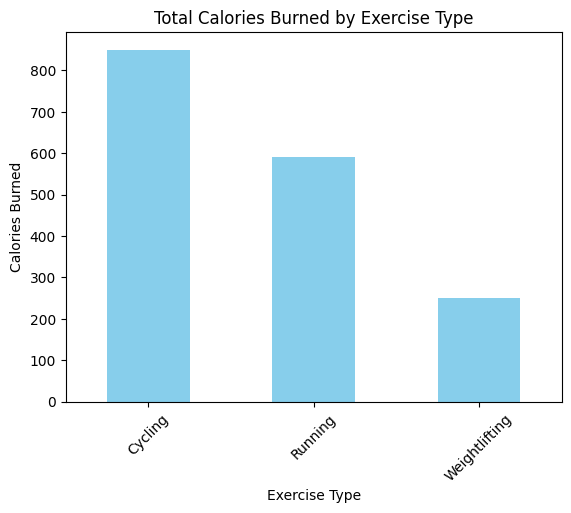

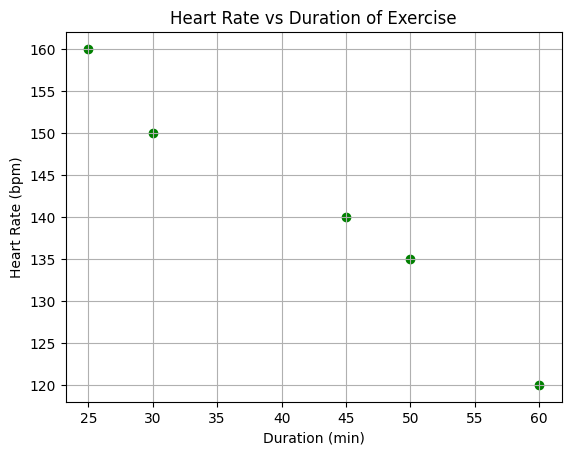

In [3]:
# Step 1: Data Collection
# We simulate the collection of gym exercise data for pharmacy/health-related analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a sample gym exercise dataset
data = {
    'Person': ['John', 'Alice', 'Mark', 'Lisa', 'James'],
    'Age': [25, 30, 22, 28, 35],
    'Exercise': ['Running', 'Cycling', 'Weightlifting', 'Running', 'Cycling'],
    'Duration': [30, 45, 60, 25, 50],  # Duration in minutes
    'Calories_Burned': [300, 400, 250, 290, 450],
    'Heart_Rate': [150, 140, 120, 160, 135]
}

df = pd.DataFrame(data)

# Step 2: Data Cleaning
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

# No missing values in the dataset, now check for duplicates
df.drop_duplicates(inplace=True)

# Checking data types
print("\nData types before cleaning:\n", df.dtypes)

# Step 3: Data Structuring
# Structuring the data to ensure it's in the right format
# (our data is already in a structured pandas DataFrame)

print("\nFirst few rows of the structured data:\n", df.head())

# Step 4: Data Enrichment
# Adding a column for 'Calories per Minute' as an enriched feature
df['Calories_per_Minute'] = df['Calories_Burned'] / df['Duration']
print("\nData after enrichment (Calories per Minute added):\n", df)

# Step 5: Data Transformation
# Grouping data by Exercise type and aggregating for mean values
exercise_summary = df.groupby('Exercise').agg({
    'Duration': 'mean',
    'Calories_Burned': 'sum',
    'Heart_Rate': 'mean'
})

print("\nTransformed Data (Grouped by Exercise Type):\n", exercise_summary)

# Step 6: Validation
# Validating by checking the integrity of the transformations
# Confirm that Calories_per_Minute is consistent with original data
df['Recalculated_Calories'] = df['Calories_per_Minute'] * df['Duration']
is_valid = np.allclose(df['Calories_Burned'], df['Recalculated_Calories'])
print("\nValidation passed?" , is_valid)

# Visualization Part:
# Bar Chart of total Calories burned by Exercise Type
exercise_summary['Calories_Burned'].plot(kind='bar', color='skyblue')
plt.title('Total Calories Burned by Exercise Type')
plt.xlabel('Exercise Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of Heart Rate vs Duration
plt.scatter(df['Duration'], df['Heart_Rate'], color='green')
plt.title('Heart Rate vs Duration of Exercise')
plt.xlabel('Duration (min)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.show()


# Datasets
## https://www.kaggle.com/search?q=pharmacy
## https://www.kaggle.com/code/kerneler/starter-cocooncenter-pharmacy-045e89a6-0
## https://data.cms.gov/provider-summary-by-type-of-service/medicare-part-d-prescribers/medicare-part-d-prescribers-by-provider-and-drug
